In [1]:
#測定データの本格的なプロット用
#すべてのデータ/シミュレーション結果はここでまとめる
#error barをちゃんとつけるところ

In [2]:
# 必要なリストは、1回の測定につき、
# 測定の統計量5セット
# 測定の時間1セット
# シミュレーションのrate5セット
# シミュレーションのflux5セット
# シミュレーションのtheta重心5セット
# これをどんどんリストに増やしていく

#####csvファイルを手動で変更しようとすると、なんかバグるかも
#####様子見るだけならok,VScode開いてないなら大丈夫かも

In [3]:
filename = "curveplot1"
number = "_0616"
num = 1

In [4]:
import numpy as np
eff = [1,1,1,1,1]
# eff = [np.float64(0.63897636776825), np.float64(0.679006124935), np.float64(0.75873811017), np.float64(0.8062705446), np.float64(0.7816459683800001)]

In [5]:
#測定の時間のリスト作るところ
#測定の統計量のリスト作るところ
import pandas as pd
df = pd.read_csv('curve_plot.csv', header=None)
time_list           = [float(df.at[i+1, 1]) for i in range(num)]
data_list           = [ [float(df.at[i+1, j+2]) for j in range(5)] for i in range(num)]
rate_list           = [ [float(df.at[i+1, j+7]) for j in range(5)] for i in range(num)]
flux_list           = [ [float(df.at[i+1, j+12]) for j in range(5)] for i in range(num)]
theta_center_list   = [ [float(df.at[i+1, j+17]) for j in range(5)] for i in range(num)]

error1_eff          = [ [float(df.at[i+1, j+22]) for j in range(5)] for i in range(num)]
error2_theta        = [ [float(df.at[i+1, j+27]) for j in range(5)] for i in range(num)]
error3_stat         = [ [float(df.at[i+1, j+32]) for j in range(5)] for i in range(num)]
error4_pos_theta    = [ [float(df.at[i+1, j+37]) for j in range(5)] for i in range(num)]
error4_pos_stat     = [ [float(df.at[i+1, j+42]) for j in range(5)] for i in range(num)]
error5_overlap      = [ [float(df.at[i+1, j+47]) for j in range(5)] for i in range(num)]
error6_rcoin        = [ [float(df.at[i+1, j+52]) for j in range(5)] for i in range(num)]

In [6]:
print(time_list)
print(data_list)
print(rate_list)
print(flux_list)
print(theta_center_list)
print("")
print(error1_eff)
print(error2_theta)
print(error3_stat)
print(error4_pos_theta)
print(error4_pos_stat)
print(error5_overlap)
print(error6_rcoin)

[14400.0]
[[1066.0, 12605.0, 4771.0, 5979.0, 3155.0]]
[[0.07481034016400281, 0.8761469386484821, 0.3305445352178732, 0.4138715935406786, 0.2159244515069215]]
[[0.007051792866160742, 0.0109340412357468, 0.0060029302672481, 0.0103976282365476, 0.0020383496577481]]
[[73.96058760300967, 33.95777858013269, 46.76379754827169, 54.92097769340294, 16.44669972110319]]

[[0.018208925146569792, 0.0134094430947064, 0.0197902721672282, 0.0129571039071009, 0.0215378282997936]]
[[0.10970820144496758, 0.0786045488890286, 0.0699560322144919, 0.1143971694453264, 0.0692513076224726]]
[[0.030628194591584446, 0.0089069409888389, 0.0144775572746418, 0.0129325963687729, 0.0178032921331012]]
[[0.01310119140879187, 0.0013868712279149, 0.0067580572426579, 0.0105441777611498, 0.0147211101098492]]
[[0.17315077642344284, 0.0013588772555134, 0.0183659587332778, 0.0436689460033012, 0.0138262177484669]]
[[2.25140712945591e-05, 0.0001713605712019, 6.036470341647453e-05, 0.0001043652784746, 1.5213946117274167e-05]]
[[0.

In [7]:
#グラフ用のリスト作成
import numpy as np
tate = [ [data_list[i][j] / (flux_list[i][j] * time_list[i] * eff[j])
            for j in range(5)]
            for i in range(num) ]

yoko = [[theta_center_list[i][j] for j in range(5)] for i in range(num)]
#手のひら(150cm^2)に1秒2.58個想定のシミュレーション、ここで個数を調節する


sim_tate = [[rate_list[i][j]/flux_list[i][j] for j in range(5)] for i in range(num)]

print(yoko)
print(tate)
print(sim_tate)

[[73.96058760300967, 33.95777858013269, 46.76379754827169, 54.92097769340294, 16.44669972110319]]
[[10.497724363546324, 80.05706246656892, 55.19295239062138, 39.93298508922242, 107.48755562589466]]
[[10.608697899082271, 80.13020252604167, 55.063863896823754, 39.80442309775247, 105.93101663699228]]


In [8]:
#誤差計算
import numpy as np

yoko_plus_error = [[ np.sqrt(error4_pos_theta[i][j]**2) 
                for j in range(5)]
                for i in range(num)]

yoko_minus_error = [ [theta_center_list[i][j]
                * np.sqrt(error4_pos_theta[i][j]**2) 
                for j in range(5)]
                for i in range(num)]
                
# yoko_minus_error = [ [theta_center_list[i][j]
#                 * np.sqrt(error2_theta[i][j]**2 + error4_pos_theta[i][j]**2) 
#                 for j in range(5)]
#                 for i in range(num)]

tate_plus_error = [ [data_list[i][j]/flux_list[i][j]/time_list[i] 
                * (np.sqrt(error3_stat[i][j]**2 + error4_pos_stat[i][j]**2 + error5_overlap[i][j]))
                / (eff[j] - error1_eff[i][j])
                for j in range(5)]
                for i in range(num)]

tate_minus_error = [ [data_list[i][j]/flux_list[i][j]/time_list[i] 
                * (np.sqrt(error3_stat[i][j]**2 + error4_pos_stat[i][j]**2 + error6_rcoin[i][j]))
                / (eff[j] + error1_eff[i][j])
                for j in range(5)]
                for i in range(num)]           


# print(yoko_plus_error)
# print(len(tate_plus_error[0]))
# print(len(tate_minus_error[0]))
# print(tate_plus_error)

In [9]:
theta = np.linspace(0, 90, 100)
peak0 = 120
cos1 = [peak0*np.cos(x/180*np.pi) for x in theta ]
cos2 = [peak0*np.cos(x/180*np.pi)**2 for x in theta ]
cos3 = [peak0*np.cos(x/180*np.pi)**3 for x in theta ]
cos4 = [peak0*np.cos(x/180*np.pi)**4 for x in theta ]

C:\Users\kmana\AppData\Local\Temp\ipykernel_12208\1871780430.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(fontsize=20)


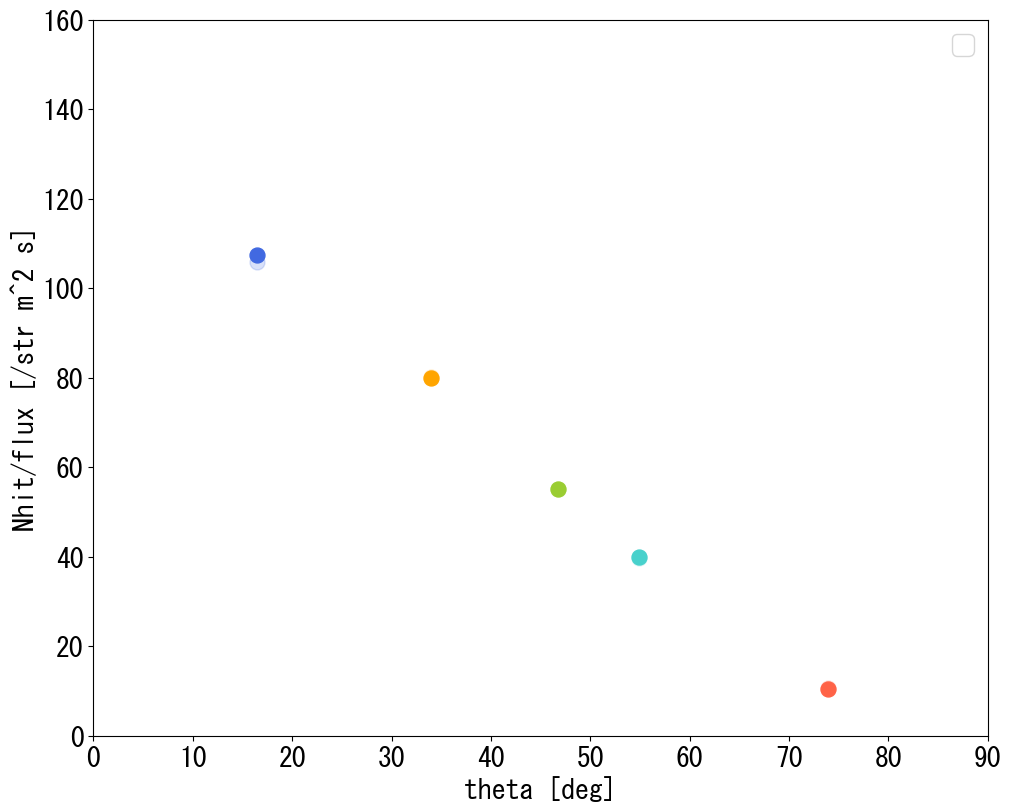

In [10]:
#pic_all
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

colorlist = ['tomato', 'orange', 'yellowgreen', 'mediumturquoise', 'royalblue']
plt.rcParams['font.family'] = 'MS Gothic'  # or 'Meiryo' MS Gothic
fig = plt.figure(figsize=(10, 8), constrained_layout=True)
ax = fig.add_subplot(1, 1, 1)

for i in range(num):
    for j in range(5):
        if tate[i][j] > 0:
            ax.scatter(yoko[i][j],  sim_tate[i][j], color=colorlist[j], alpha=0.2, s=115)
            ax.scatter(yoko[i][j],  tate[i][j], color=colorlist[j], alpha=1.0, s=115)
            # ax.errorbar(yoko[i][j], tate[i][j], yerr=[[tate_minus_error[i][j]], [tate_plus_error[i][j]]], fmt='o', color=colorlist[j], alpha=0.6, capsize=6)
            # ax.errorbar(yoko[i][j], tate[i][j], xerr=[[yoko_minus_error[i][j]], [yoko_plus_error[i][j]]], fmt='o', color=colorlist[j], alpha=0.6, capsize=6)

# ax.plot(theta, cos1, label ="cos1", color = 'gray', alpha=1.0)
# ax.plot(theta, cos2, label="cos2", color = 'gray', alpha=0.6)
# ax.plot(theta, cos3, label="cos3", color = 'gray', alpha=0.4)
# ax.plot(theta, cos4, label="cos4", color = 'gray', alpha=0.2)
ax.set_xlabel("theta [deg]", fontsize=20)
ax.set_ylabel("Nhit/flux [/str m^2 s]", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlim(0,90)
ax.set_ylim(0,160)
ax.legend(fontsize=20)

fig.savefig("./pic/curve_plot/" + filename + number + "_all.png", dpi=300)  # 画像を保存
plt.show()

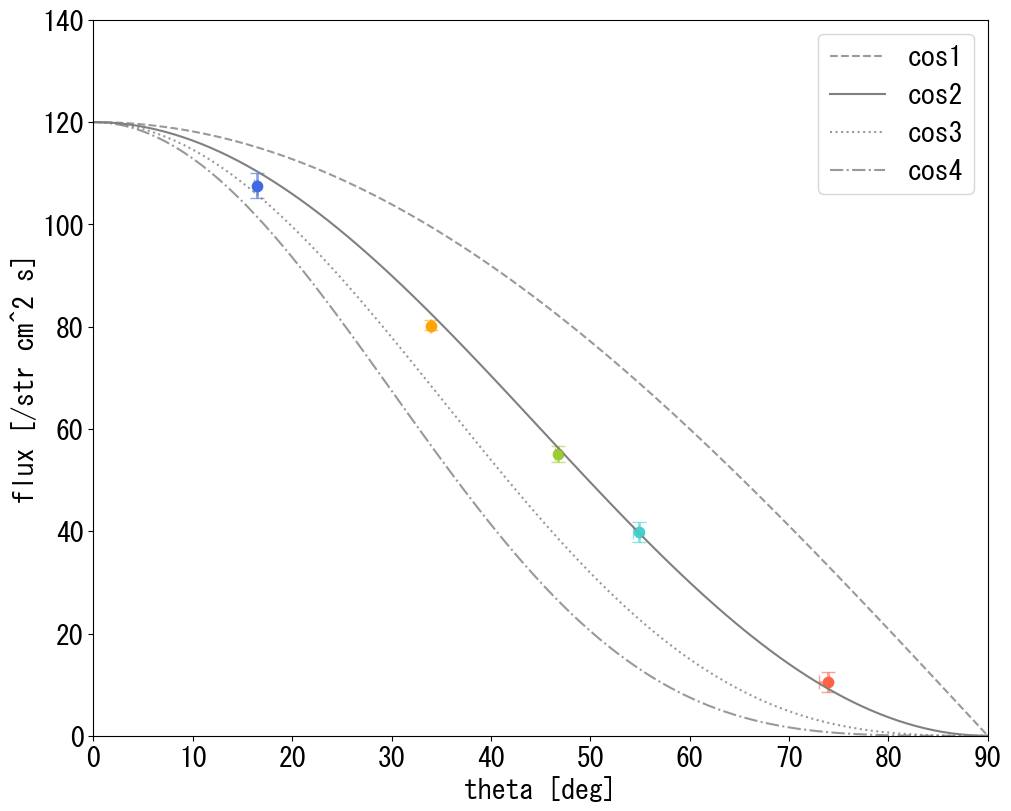

In [11]:
#pic_data
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

colorlist = ['tomato', 'orange', 'yellowgreen', 'mediumturquoise', 'royalblue']
plt.rcParams['font.family'] = 'MS Gothic'  # or 'Meiryo' MS Gothic
fig = plt.figure(figsize=(10, 8), constrained_layout=True)
ax = fig.add_subplot(1, 1, 1)

for i in range(num):
    for j in range(5):
        if tate[i][j] > 0:
            # ax.scatter(yoko[i][j],  sim_tate[i][j], color=colorlist[j], alpha=0.2, s=115)
            ax.scatter(yoko[i][j],  tate[i][j], color=colorlist[j], alpha=1.0, s=55)
            ax.errorbar(yoko[i][j], tate[i][j], yerr=[[tate_minus_error[i][j]], [tate_plus_error[i][j]]], fmt='o', color=colorlist[j], alpha=0.6, capsize=5, elinewidth=2.0)
            ax.errorbar(yoko[i][j], tate[i][j], xerr=[[yoko_minus_error[i][j]], [yoko_plus_error[i][j]]], fmt='o', color=colorlist[j], alpha=0.6, capsize=5, elinewidth=2.0)

ax.plot(theta, cos1, label ="cos1", color = 'gray', alpha=0.8, linestyle='--')
ax.plot(theta, cos2, label="cos2", color = 'gray', alpha=1.0)
ax.plot(theta, cos3, label="cos3", color = 'gray', alpha=0.8, linestyle=':')
ax.plot(theta, cos4, label="cos4", color = 'gray', alpha=0.8, linestyle='-.')
ax.set_xlabel("theta [deg]", fontsize=20)
ax.set_ylabel("flux [/str cm^2 s]", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlim(0,90)
ax.set_ylim(0,140)
ax.legend(fontsize=20)

fig.savefig("./pic/curve_plot/" + filename + number + "_data.png", dpi=300)  # 画像を保存
plt.show()

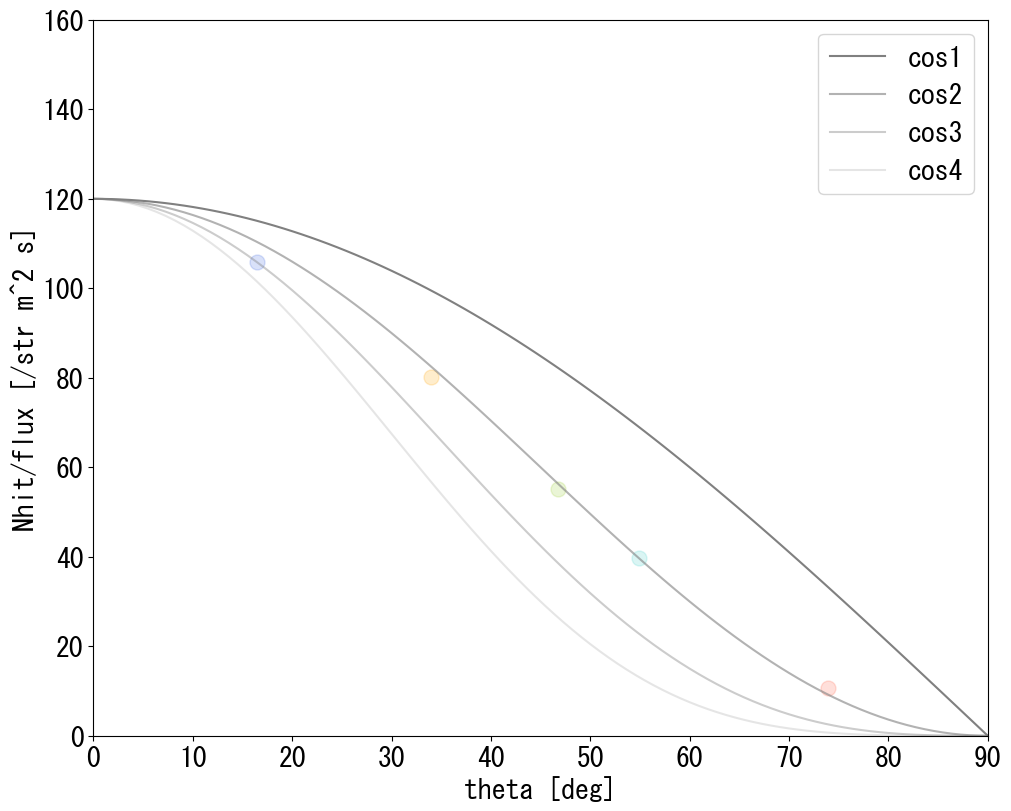

In [12]:
#pic_sim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

colorlist = ['tomato', 'orange', 'yellowgreen', 'mediumturquoise', 'royalblue']
plt.rcParams['font.family'] = 'MS Gothic'  # or 'Meiryo' MS Gothic
fig = plt.figure(figsize=(10, 8), constrained_layout=True)
ax = fig.add_subplot(1, 1, 1)

for i in range(num):
    for j in range(5):
        if tate[i][j] > 0:
            ax.scatter(yoko[i][j],  sim_tate[i][j], color=colorlist[j], alpha=0.2, s=115)
            # ax.scatter(yoko[i][j],  tate[i][j], color=colorlist[j], alpha=1.0, s=115)
            # ax.errorbar(yoko[i][j], tate[i][j], yerr=[[tate_minus_error[i][j]], [tate_plus_error[i][j]]], fmt='o', color=colorlist[j], alpha=0.6, capsize=6)
            # ax.errorbar(yoko[i][j], tate[i][j], xerr=[[yoko_minus_error[i][j]], [yoko_plus_error[i][j]]], fmt='o', color=colorlist[j], alpha=0.6, capsize=6)

ax.plot(theta, cos1, label ="cos1", color = 'gray', alpha=1.0)
ax.plot(theta, cos2, label="cos2", color = 'gray', alpha=0.6)
ax.plot(theta, cos3, label="cos3", color = 'gray', alpha=0.4)
ax.plot(theta, cos4, label="cos4", color = 'gray', alpha=0.2)
ax.set_xlabel("theta [deg]", fontsize=20)
ax.set_ylabel("Nhit/flux [/str m^2 s]", fontsize=20)
ax.tick_params(axis='x', labelsize=20)
ax.tick_params(axis='y', labelsize=20)
ax.set_xlim(0,90)
ax.set_ylim(0,160)
ax.legend(fontsize=20)

fig.savefig("./pic/curve_plot/" + filename + number + "_sim.png", dpi=300)  # 画像を保存
plt.show()

In [13]:
# num, yoko, tate, sim_tate, 
# tate_plus_error, tate_minus_error, yoko_plus_error, yoko_minus_errorを格納する

import pandas as pd
fd = pd.read_csv('fit_data.csv', header=None)
for i in range(num):
    fd.at[i+1, 0] = int(i)
    for j in range(5):
        fd.at[i+1, j+1] = tate[i][j]
        fd.at[i+1, j+6] = yoko[i][j]
        fd.at[i+1, j+11] = sim_tate[i][j]
        fd.at[i+1, j+16] = tate_plus_error[i][j]
        fd.at[i+1, j+21] = tate_minus_error[i][j]
        fd.at[i+1, j+26] = yoko_plus_error[i][j]
        fd.at[i+1, j+31] = yoko_minus_error[i][j]

fd.to_csv('fit_data.csv', index=False, header=False)